In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from math import dist

In [6]:
class Hospital:
    def __init__(self, name, longitude, latitude):
        self.name = name
        self.longitude = longitude
        self.latitude = latitude

def create_graph(hospitals):
    G = nx.Graph()

    # Agregar nodos al grafo
    for hospital in hospitals:
        G.add_node(hospital.name)

    # Obtener la longitud y latitud de cada hospital
    coordinates = {hospital.name: (hospital.longitude, hospital.latitude) for hospital in hospitals}

    # Recorrer los hospitales y agregar las aristas
    for i, hospital in enumerate(hospitals):
        # Coordenadas del hospital actual
        x1, y1 = coordinates[hospital.name]

        # Determinar el número de aristas según la posición del hospital
        if i == 0 or i == len(hospitals) - 1:
            num_edges = 3
        elif i == 1 or i == len(hospitals) - 2:
            num_edges = 5
        else:
            num_edges = 9

        # Obtener los hospitales vecinos según el número de aristas
        start = max(0, i - (num_edges // 2))
        end = min(len(hospitals), i + (num_edges // 2) + 1)
        neighbors = hospitals[start:end]

        # Agregar las aristas con la distancia como atributo
        for neighbor in neighbors:
            if hospital != neighbor:
                x2, y2 = coordinates[neighbor.name]
                distance = dist((x1, y1), (x2, y2))
                G.add_edge(hospital.name, neighbor.name, distance=distance)

    return G

# Crear instancias de hospitales con coordenadas
hospitals = [
    Hospital("Hospital B", 300, 400),
    Hospital("Hospital C", 500, 600),
    Hospital("Hospital D", 700, 800),
    Hospital("Hospital E", 800, 900),
    Hospital("Hospital A", 900, 500),
    Hospital("Hospital F", 1000, 600),
    Hospital("Hospital G", 1100, 700),
    Hospital("Hospital H", 1200, 800),
    Hospital("Hospital I", 1300, 900),
    Hospital("Hospital J", 1400, 1000),
    Hospital("Hospital K", 1500, 1100),
    Hospital("Hospital L", 1600, 1200),
]

# Crear el grafo
graph = create_graph(hospitals)

# Imprimir información del grafo
print("Nodos:", graph.nodes())

Nodos: ['Hospital B', 'Hospital C', 'Hospital D', 'Hospital E', 'Hospital A', 'Hospital F', 'Hospital G', 'Hospital H', 'Hospital I', 'Hospital J', 'Hospital K', 'Hospital L']


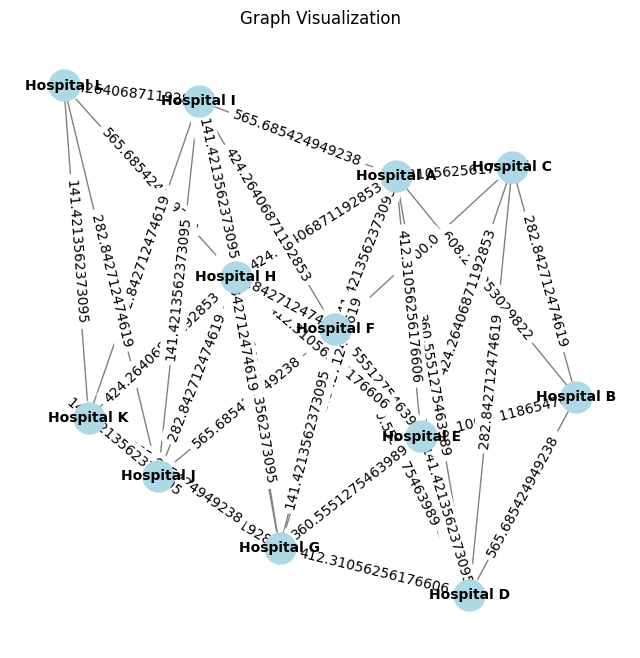

In [7]:

def visualize_graph(graph):
    pos = nx.spring_layout(graph)

    plt.figure(figsize=(8, 8))
    nx.draw_networkx_nodes(graph, pos, node_color='lightblue', node_size=500)
    nx.draw_networkx_edges(graph, pos, edge_color='gray')
    nx.draw_networkx_labels(graph, pos, font_size=10, font_weight='bold')
    edge_labels = nx.get_edge_attributes(graph, 'distance')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

    plt.title('Graph Visualization')
    plt.axis('off')
    plt.show()
visualize_graph(graph)

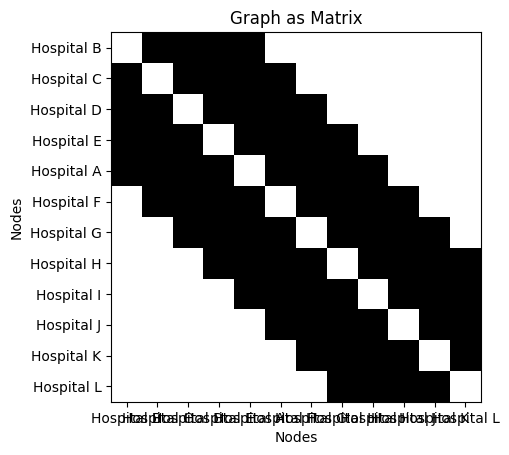

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def visualize_graph_as_matrix(graph):
    nodes = list(graph.nodes())
    n = len(nodes)
    matrix = np.zeros((n, n))

    for u, v in graph.edges():
        u_index = nodes.index(u)
        v_index = nodes.index(v)
        matrix[u_index][v_index] = 1
        matrix[v_index][u_index] = 1

    plt.imshow(matrix, cmap='binary')
    plt.xticks(np.arange(n), nodes)
    plt.yticks(np.arange(n), nodes)
    plt.xlabel("Nodes")
    plt.ylabel("Nodes")
    plt.title("Graph as Matrix")
    plt.show()
visualize_graph_as_matrix(graph)